In [139]:
from IPython.display import HTML, display

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

import pandas as pd
import numpy as np

In [174]:
#Load data
data = pd.read_csv('real_sale_apar_shop_10minswalk.csv')
df = pd.DataFrame(data, columns = ['ID','Houses','Apartments','Rooms','District I','District II','District III','District IV','District V','District VI','District VII','District VIII','District IX','District X','District XI','District XII','District XIII','District XIV','District XV','District XVI','District XVII','District XVIII','District XIX','District XX','District XXI','District XXII','District XXIII','Price(HUF per month)','Size(sqm)','Price_per_sqmHUF','Street','Floor','Name of Residential complex','Parking place','View','View: Garden view','View: Panoramic view','View: Street view','Elevator','Lift','Air conditioning','Air conditioner','Number of rooms','Number of rooms: whole rooms','Number of rooms: half rooms','Condition of property','Condition of property: Newly build','Condition of property: In good condition','Condition of property: Renovated','Condition of property: In medium condition','Condition of property: Needs renovation','Condition of property: Mint','Utility level','Utility: double comfort',	'Utility: full comfort','Utility luxury','Energy Performance Certificate','Furnished','Floors of the building','Ceiling height','Heating','Heating: gas','Heating: wall_heating','Heating: combination','Heating: ceiling','Heating: central heating','Accessible','Bathroom and toilet','Bathroom: separate','Bathroom: together','Orientation','Orientation: North','Orientation: South','Orientation: East','Orientation: West','Orientation: Northeast','Orientation: Northwest','Orientation: Southwest','Orientation: Southeast','Garden access','Balcony (sqm)','Attic','Attic: Loft conversion','Attic: Penthouse','Attic: Top floor','Transportation','Latitude','Longitude','Lats','Lons','Postcode','District','Shop_Artmusic_hobbies','Shop_Beauty','Shop_Clothing_shoes_accessories','Shop_Convenience_shop','Shop_Department_Store','Shop_Discount_store_charity','Shop_Food_beverages','Shop_Health','Shop_Laundry','Shop_Mall','Shop_Stationery_gifts_books_newspapers','Shop_Supermarket','Shop_Travel_Agency','Shop_Others', 'Distance_to_Danube', 'Distance_to_City_Centre','Distance_to_Keleti','Distance_to_Nyugati','Distance_to_Deli','Distance_to_Airport','Distance_to_Eco_Zone','Distance_to_Crime_Pot','Distance_to_Uni1','Distance_to_Uni2','Distance_to_Uni3','Distance_to_Uni4','Distance_to_Uni5','Distance_to_Uni6','Distance_to_Uni7','Distance_to_Uni8','Distance_to_Uni9','Distance_to_Uni10','Distance_to_Uni11','Distance_to_Uni12','Distance_to_Uni13','Distance_to_Uni14','Distance_to_Uni15','Distance_to_Uni16','Distance_to_Uni17','Distance_to_Uni18','Distance_to_Uni19','Distance_to_Uni20','Distance_to_Uni21'])

print(df)

          ID  Houses  Apartments  Rooms  District I  District II  \
0          0       0           1      0           0            0   
1          1       0           1      0           0            0   
2          2       0           1      0           0            0   
3          3       0           1      0           0            0   
4          4       0           1      0           0            0   
5          5       0           1      0           0            0   
6          6       0           1      0           0            0   
7          7       0           1      0           0            0   
8          8       0           1      0           0            0   
9          9       0           1      0           0            0   
10        10       0           1      0           0            0   
11        11       0           1      0           0            0   
12        12       0           1      0           0            0   
13        13       0           1      0         

In [146]:
#Explotary Analysis here

In [147]:
# fit our model with .fit() and show results
# we use statsmodels' formula API to invoke the syntax below,
# where we write out the formula using ~
housing_model = ols("Price_per_sqmHUF ~ Shop_Food_beverages", data=df).fit()

# summarize our model
housing_model_summary = housing_model.summary()

# convert our table to HTML and add colors to headers for explanatory purposes
HTML(
(housing_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

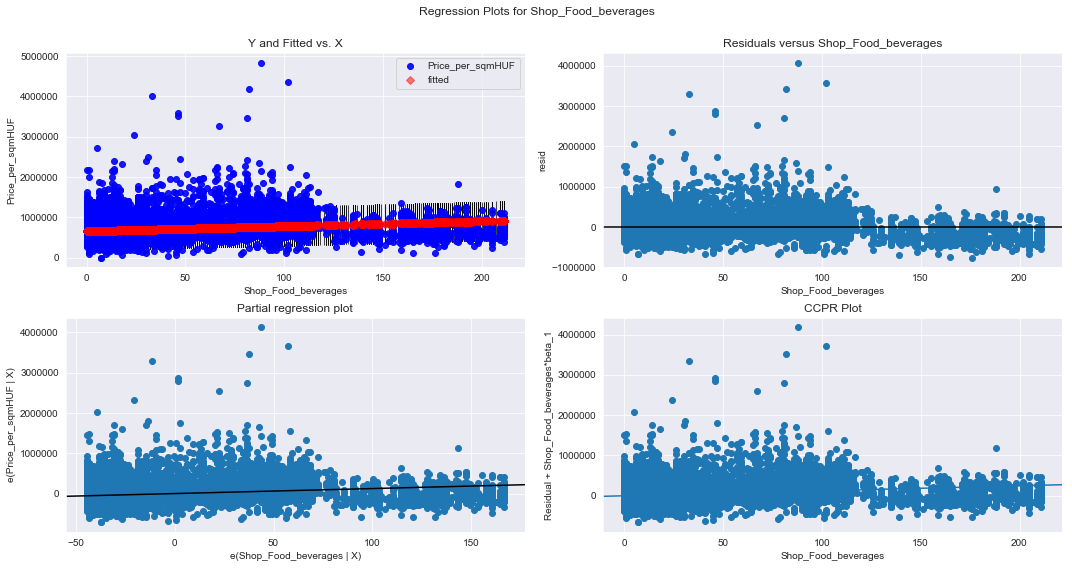

In [148]:
# This produces our four regression plots for total_unemployed

fig = plt.figure(figsize=(15,8))

# pass in the model as the first parameter, then specify the 
# predictor variable we want to analyze
fig = sm.graphics.plot_regress_exog(housing_model, "Shop_Food_beverages", fig=fig)

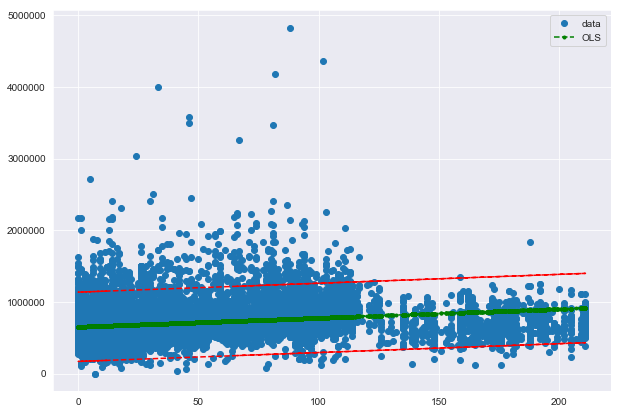

In [149]:
# predictor variable (x) and dependent variable (y)
x = df[['Shop_Food_beverages']]
y = df[['Price_per_sqmHUF']]

# Retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(housing_model)

fig, ax = plt.subplots(figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, housing_model.fittedvalues, 'g--.', label="OLS")

# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')

# plot legend
ax.legend(loc='best');

In [150]:
# fit our model with .fit() and show results
# we use statsmodels' formula API to invoke the syntax below,
# where we write out the formula using ~
housing_model = ols("Price_per_sqmHUF ~ Shop_Artmusic_hobbies", data=df).fit()

# summarize our model
housing_model_summary = housing_model.summary()

# convert our table to HTML and add colors to headers for explanatory purposes
HTML(
(housing_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

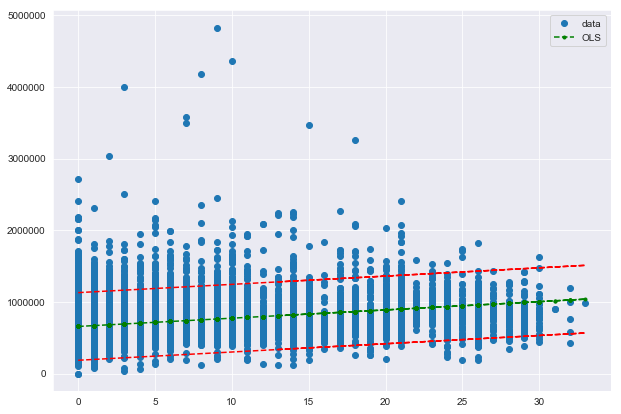

In [151]:
# predictor variable (x) and dependent variable (y)
x = df[['Shop_Artmusic_hobbies']]
y = df[['Price_per_sqmHUF']]

# Retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(housing_model)

fig, ax = plt.subplots(figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, housing_model.fittedvalues, 'g--.', label="OLS")

# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')

# plot legend
ax.legend(loc='best');

In [152]:
# fit our model with .fit() and show results
# we use statsmodels' formula API to invoke the syntax below,
# where we write out the formula using ~
housing_model = ols("Price_per_sqmHUF ~ Shop_Beauty", data=df).fit()

# summarize our model
housing_model_summary = housing_model.summary()

# convert our table to HTML and add colors to headers for explanatory purposes
HTML(
(housing_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

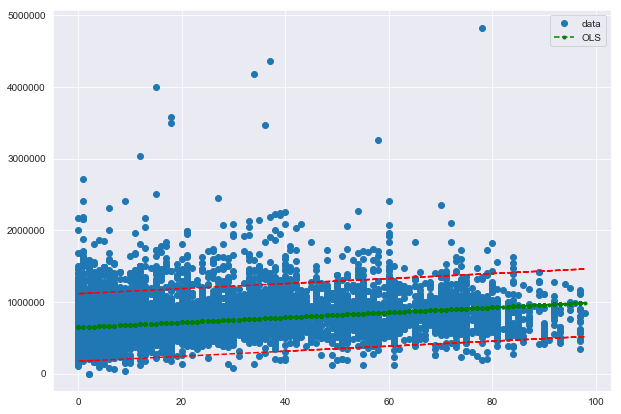

In [153]:
# predictor variable (x) and dependent variable (y)
x = df[['Shop_Beauty']]
y = df[['Price_per_sqmHUF']]

# Retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(housing_model)

fig, ax = plt.subplots(figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, housing_model.fittedvalues, 'g--.', label="OLS")

# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')

# plot legend
ax.legend(loc='best');

In [154]:
# fit our model with .fit() and show results
# we use statsmodels' formula API to invoke the syntax below,
# where we write out the formula using ~
housing_model = ols("Price_per_sqmHUF ~ Shop_Clothing_shoes_accessories", data=df).fit()

# summarize our model
housing_model_summary = housing_model.summary()

# convert our table to HTML and add colors to headers for explanatory purposes
HTML(
(housing_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

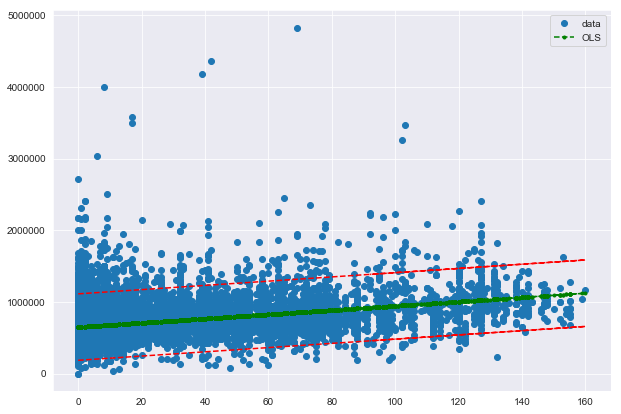

In [155]:
# predictor variable (x) and dependent variable (y)
x = df[['Shop_Clothing_shoes_accessories']]
y = df[['Price_per_sqmHUF']]

#####Find a way to remove outliers. Delted value:13250000 index: 8478

# Retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(housing_model)

fig, ax = plt.subplots(1,figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, housing_model.fittedvalues, 'g--.', label="OLS")

# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')

# plot legend
ax.legend(loc='best');

In [156]:
# fit our model with .fit() and show results
# we use statsmodels' formula API to invoke the syntax below,
# where we write out the formula using ~
housing_model = ols("Price_per_sqmHUF ~ Shop_Convenience_shop", data=df).fit()

# summarize our model
housing_model_summary = housing_model.summary()

# convert our table to HTML and add colors to headers for explanatory purposes
HTML(
(housing_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

In [157]:
# fit our model with .fit() and show results
# we use statsmodels' formula API to invoke the syntax below,
# where we write out the formula using ~
housing_model = ols("Price_per_sqmHUF ~ Shop_Department_Store", data=df).fit()

# summarize our model
housing_model_summary = housing_model.summary()

# convert our table to HTML and add colors to headers for explanatory purposes
HTML(
(housing_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

In [158]:
# fit our model with .fit() and show results
# we use statsmodels' formula API to invoke the syntax below,
# where we write out the formula using ~
housing_model = ols("Price_per_sqmHUF ~ Shop_Discount_store_charity", data=df).fit()

# summarize our model
housing_model_summary = housing_model.summary()

# convert our table to HTML and add colors to headers for explanatory purposes
HTML(
(housing_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

In [159]:
# fit our model with .fit() and show results
# we use statsmodels' formula API to invoke the syntax below,
# where we write out the formula using ~
housing_model = ols("Price_per_sqmHUF ~ Shop_Health", data=df).fit()

# summarize our model
housing_model_summary = housing_model.summary()

# convert our table to HTML and add colors to headers for explanatory purposes
HTML(
(housing_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

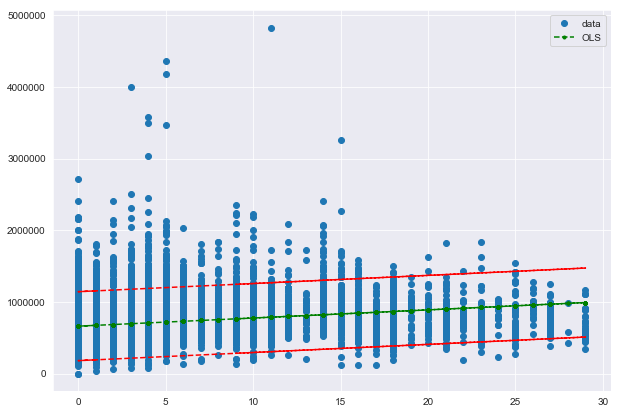

In [160]:
# predictor variable (x) and dependent variable (y)
x = df[['Shop_Health']]
y = df[['Price_per_sqmHUF']]

# Retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(housing_model)

fig, ax = plt.subplots(figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, housing_model.fittedvalues, 'g--.', label="OLS")

# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')

# plot legend
ax.legend(loc='best');

In [161]:
# fit our model with .fit() and show results
# we use statsmodels' formula API to invoke the syntax below,
# where we write out the formula using ~
housing_model = ols("Price_per_sqmHUF ~ Shop_Laundry", data=df).fit()

# summarize our model
housing_model_summary = housing_model.summary()

# convert our table to HTML and add colors to headers for explanatory purposes
HTML(
(housing_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

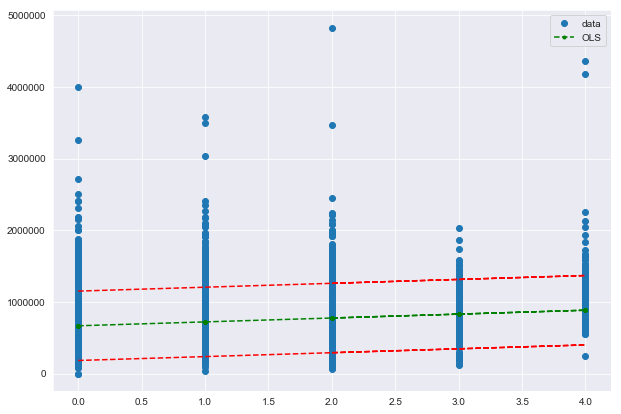

In [162]:
# predictor variable (x) and dependent variable (y)
x = df[['Shop_Laundry']]
y = df[['Price_per_sqmHUF']]

# Retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(housing_model)

fig, ax = plt.subplots(figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, housing_model.fittedvalues, 'g--.', label="OLS")

# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')

# plot legend
ax.legend(loc='best');

In [163]:
# fit our model with .fit() and show results
# we use statsmodels' formula API to invoke the syntax below,
# where we write out the formula using ~
housing_model = ols("Price_per_sqmHUF ~ Shop_Mall", data=df).fit()

# summarize our model
housing_model_summary = housing_model.summary()

# convert our table to HTML and add colors to headers for explanatory purposes
HTML(
(housing_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

In [164]:
# fit our model with .fit() and show results
# we use statsmodels' formula API to invoke the syntax below,
# where we write out the formula using ~
housing_model = ols("Price_per_sqmHUF ~ Shop_Stationery_gifts_books_newspapers", data=df).fit()

# summarize our model
housing_model_summary = housing_model.summary()

# convert our table to HTML and add colors to headers for explanatory purposes
HTML(
(housing_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

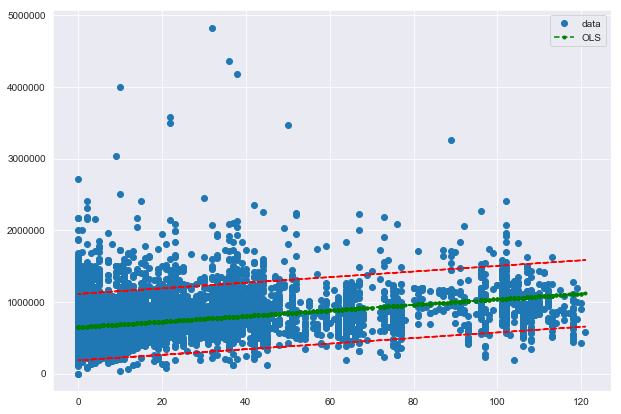

In [165]:
# predictor variable (x) and dependent variable (y)
x = df[['Shop_Stationery_gifts_books_newspapers']]
y = df[['Price_per_sqmHUF']]

# Retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(housing_model)

fig, ax = plt.subplots(figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, housing_model.fittedvalues, 'g--.', label="OLS")

# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')

# plot legend
ax.legend(loc='best');

In [166]:
# fit our model with .fit() and show results
# we use statsmodels' formula API to invoke the syntax below,
# where we write out the formula using ~
housing_model = ols("Price_per_sqmHUF ~ Shop_Supermarket", data=df).fit()

# summarize our model
housing_model_summary = housing_model.summary()

# convert our table to HTML and add colors to headers for explanatory purposes
HTML(
(housing_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

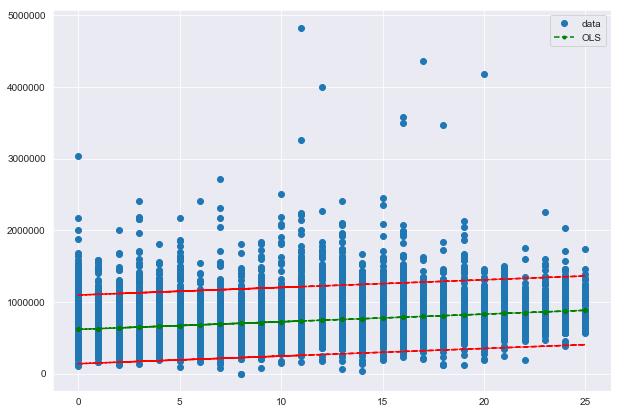

In [167]:
# predictor variable (x) and dependent variable (y)
x = df[['Shop_Supermarket']]
y = df[['Price_per_sqmHUF']]

# Retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(housing_model)

fig, ax = plt.subplots(figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, housing_model.fittedvalues, 'g--.', label="OLS")

# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')

# plot legend
ax.legend(loc='best');

In [168]:
# fit our model with .fit() and show results
# we use statsmodels' formula API to invoke the syntax below,
# where we write out the formula using ~
housing_model = ols("Price_per_sqmHUF ~ Shop_Travel_Agency", data=df).fit()

# summarize our model
housing_model_summary = housing_model.summary()

# convert our table to HTML and add colors to headers for explanatory purposes
HTML(
(housing_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

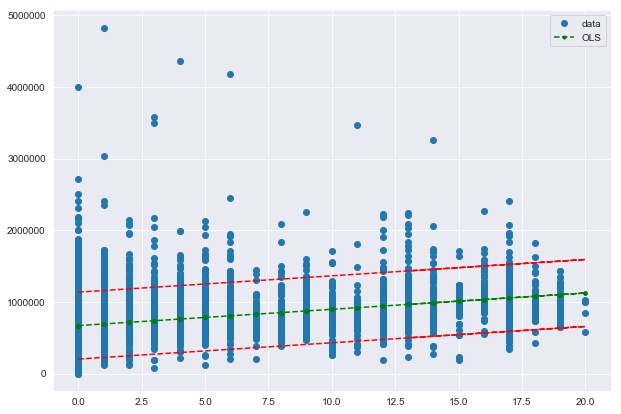

In [169]:
# predictor variable (x) and dependent variable (y)
x = df[['Shop_Travel_Agency']]
y = df[['Price_per_sqmHUF']]

# Retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(housing_model)

fig, ax = plt.subplots(figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, housing_model.fittedvalues, 'g--.', label="OLS")

# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')

# plot legend
ax.legend(loc='best');

In [170]:
# fit our model with .fit() and show results
# we use statsmodels' formula API to invoke the syntax below,
# where we write out the formula using ~
housing_model = ols("Price_per_sqmHUF ~ Shop_Others", data=df).fit()

# summarize our model
housing_model_summary = housing_model.summary()

# convert our table to HTML and add colors to headers for explanatory purposes
HTML(
(housing_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

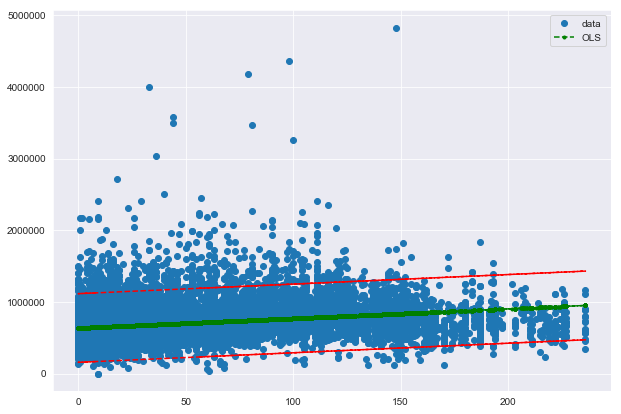

In [175]:
# predictor variable (x) and dependent variable (y)
x = df[['Shop_Others']]
y = df[['Price_per_sqmHUF']]

# Retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(housing_model)

fig, ax = plt.subplots(figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, housing_model.fittedvalues, 'g--.', label="OLS")

# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')

# plot legend
ax.legend(loc='best');

In [177]:
# fit our model with .fit() and show results
# we use statsmodels' formula API to invoke the syntax below,
# where we write out the formula using ~
housing_model = ols("Price_per_sqmHUF ~ Distance_to_Danube", data=df).fit()

# summarize our model
housing_model_summary = housing_model.summary()

# convert our table to HTML and add colors to headers for explanatory purposes
HTML(
(housing_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

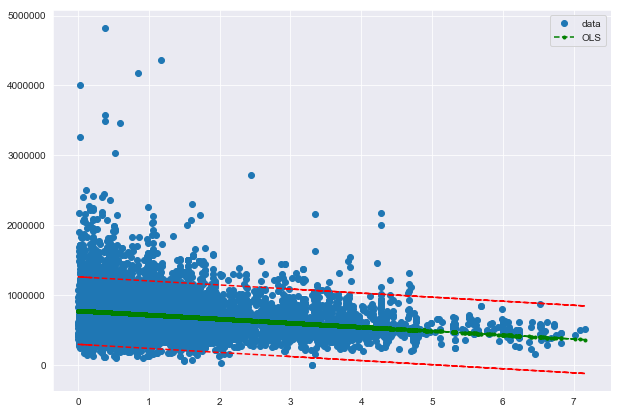

In [178]:
# predictor variable (x) and dependent variable (y)
x = df[['Distance_to_Danube']]
y = df[['Price_per_sqmHUF']]

# Retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(housing_model)

fig, ax = plt.subplots(figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, housing_model.fittedvalues, 'g--.', label="OLS")

# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')

# plot legend
ax.legend(loc='best');

In [179]:
# fit our model with .fit() and show results
# we use statsmodels' formula API to invoke the syntax below,
# where we write out the formula using ~
housing_model = ols("Price_per_sqmHUF ~ Distance_to_City_Centre", data=df).fit()

# summarize our model
housing_model_summary = housing_model.summary()

# convert our table to HTML and add colors to headers for explanatory purposes
HTML(
(housing_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

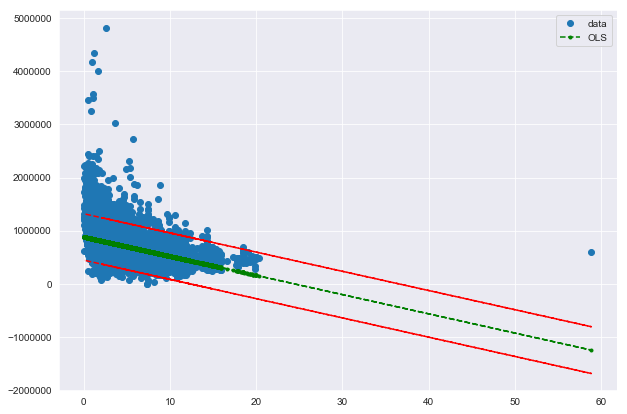

In [181]:
# predictor variable (x) and dependent variable (y)
x = df[['Distance_to_City_Centre']]
y = df[['Price_per_sqmHUF']]

# Retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(housing_model)

fig, ax = plt.subplots(figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, housing_model.fittedvalues, 'g--.', label="OLS")

# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')

# plot legend
ax.legend(loc='best');

In [182]:
# fit our model with .fit() and show results
# we use statsmodels' formula API to invoke the syntax below,
# where we write out the formula using ~
housing_model = ols("Price_per_sqmHUF ~ Distance_to_Keleti", data=df).fit()

# summarize our model
housing_model_summary = housing_model.summary()

# convert our table to HTML and add colors to headers for explanatory purposes
HTML(
(housing_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

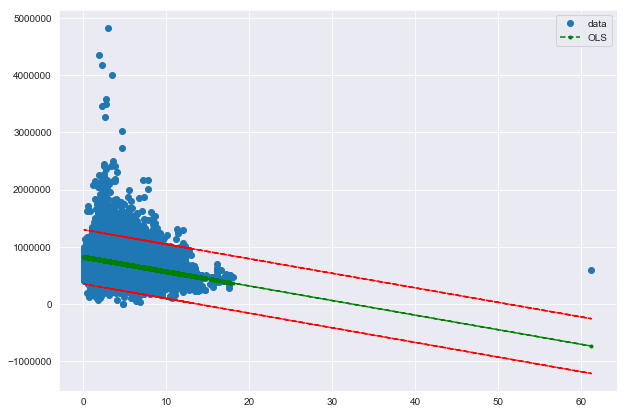

In [183]:
# predictor variable (x) and dependent variable (y)
x = df[['Distance_to_Keleti']]
y = df[['Price_per_sqmHUF']]

# Retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(housing_model)

fig, ax = plt.subplots(figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, housing_model.fittedvalues, 'g--.', label="OLS")

# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')

# plot legend
ax.legend(loc='best');

In [184]:
# fit our model with .fit() and show results
# we use statsmodels' formula API to invoke the syntax below,
# where we write out the formula using ~
housing_model = ols("Price_per_sqmHUF ~ Distance_to_Nyugati", data=df).fit()

# summarize our model
housing_model_summary = housing_model.summary()

# convert our table to HTML and add colors to headers for explanatory purposes
HTML(
(housing_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

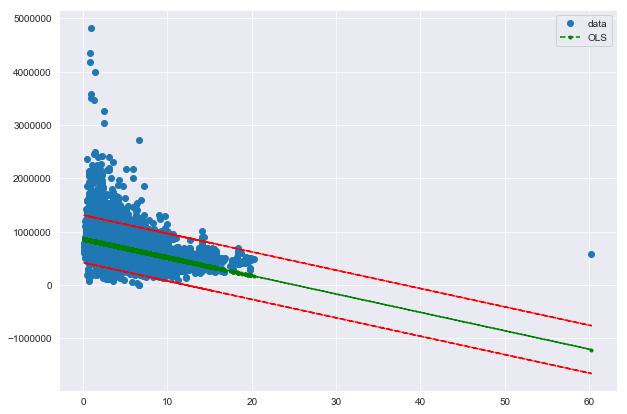

In [185]:
# predictor variable (x) and dependent variable (y)
x = df[['Distance_to_Nyugati']]
y = df[['Price_per_sqmHUF']]

# Retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(housing_model)

fig, ax = plt.subplots(figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, housing_model.fittedvalues, 'g--.', label="OLS")

# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')

# plot legend
ax.legend(loc='best');

In [186]:
# fit our model with .fit() and show results
# we use statsmodels' formula API to invoke the syntax below,
# where we write out the formula using ~
housing_model = ols("Price_per_sqmHUF ~ Distance_to_Deli", data=df).fit()

# summarize our model
housing_model_summary = housing_model.summary()

# convert our table to HTML and add colors to headers for explanatory purposes
HTML(
(housing_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

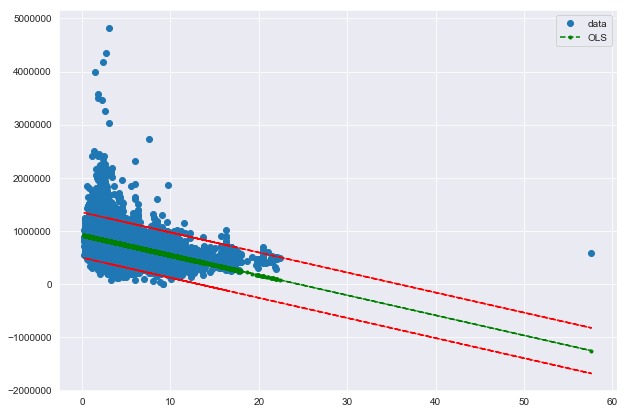

In [187]:
# predictor variable (x) and dependent variable (y)
x = df[['Distance_to_Deli']]
y = df[['Price_per_sqmHUF']]

# Retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(housing_model)

fig, ax = plt.subplots(figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, housing_model.fittedvalues, 'g--.', label="OLS")

# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')

# plot legend
ax.legend(loc='best');

In [188]:
# fit our model with .fit() and show results
# we use statsmodels' formula API to invoke the syntax below,
# where we write out the formula using ~
housing_model = ols("Price_per_sqmHUF ~ Distance_to_Airport", data=df).fit()

# summarize our model
housing_model_summary = housing_model.summary()

# convert our table to HTML and add colors to headers for explanatory purposes
HTML(
(housing_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

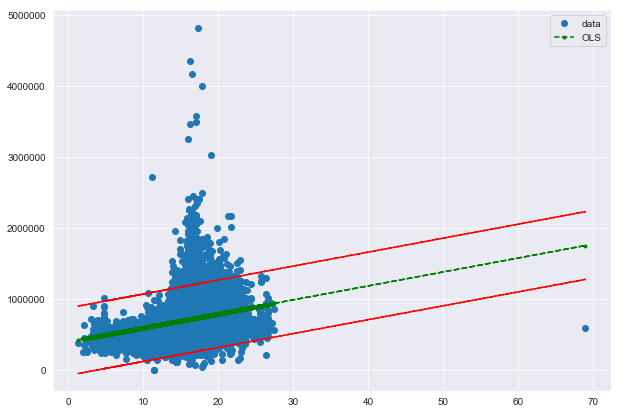

In [189]:
# predictor variable (x) and dependent variable (y)
x = df[['Distance_to_Airport']]
y = df[['Price_per_sqmHUF']]

# Retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(housing_model)

fig, ax = plt.subplots(figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, housing_model.fittedvalues, 'g--.', label="OLS")

# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')

# plot legend
ax.legend(loc='best');

In [190]:
# fit our model with .fit() and show results
# we use statsmodels' formula API to invoke the syntax below,
# where we write out the formula using ~
housing_model = ols("Price_per_sqmHUF ~ Distance_to_Uni1", data=df).fit()

# summarize our model
housing_model_summary = housing_model.summary()

# convert our table to HTML and add colors to headers for explanatory purposes
HTML(
(housing_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

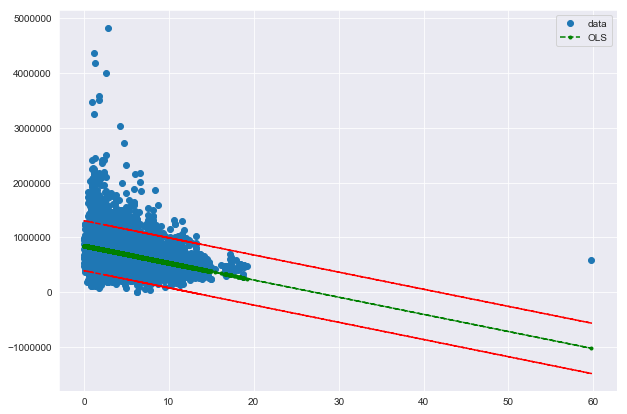

In [191]:
# predictor variable (x) and dependent variable (y)
x = df[['Distance_to_Uni1']]
y = df[['Price_per_sqmHUF']]

# Retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(housing_model)

fig, ax = plt.subplots(figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, housing_model.fittedvalues, 'g--.', label="OLS")

# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')

# plot legend
ax.legend(loc='best');

In [193]:
X1 = df[['View: Garden view']]
Y = df[['Price_per_sqmHUF']]
print('pointbiserialr: \n', stats.pointbiserialr(X1, Y))

pointbiserialr: 
 PointbiserialrResult(correlation=array([-0.0092799]), pvalue=array([0.23494141]))


In [194]:
X1 = df[['View: Panoramic view']]
Y = df[['Price_per_sqmHUF']]
print('pointbiserialr: \n', stats.pointbiserialr(X1, Y))

pointbiserialr: 
 PointbiserialrResult(correlation=array([0.10372627]), pvalue=array([1.98556446e-40]))


In [195]:
X1 = df[['View: Street view']]
Y = df[['Price_per_sqmHUF']]
print('pointbiserialr: \n', stats.pointbiserialr(X1, Y))

pointbiserialr: 
 PointbiserialrResult(correlation=array([0.00177678]), pvalue=array([0.82010973]))


In [196]:
X1 = df[['Lift']]
Y = df[['Price_per_sqmHUF']]
print('pointbiserialr: \n', stats.pointbiserialr(X1, Y))

pointbiserialr: 
 PointbiserialrResult(correlation=array([0.1748617]), pvalue=array([1.23024261e-112]))


In [197]:
X1 = df[['Number of rooms: whole rooms']]
Y = df[['Price_per_sqmHUF']]
print('pointbiserialr: \n', stats.pointbiserialr(X1, Y))

pointbiserialr: 
 PointbiserialrResult(correlation=array([0.05516963]), pvalue=array([1.59072608e-12]))


In [198]:
X1 = df[['Heating: gas']]
Y = df[['Price_per_sqmHUF']]
print('pointbiserialr: \n', stats.pointbiserialr(X1, Y))

pointbiserialr: 
 PointbiserialrResult(correlation=array([-0.07071985]), pvalue=array([1.27469527e-19]))


In [199]:
X1 = df[['Heating: wall_heating']]
Y = df[['Price_per_sqmHUF']]
print('pointbiserialr: \n', stats.pointbiserialr(X1, Y))

pointbiserialr: 
 PointbiserialrResult(correlation=array([0.00569159]), pvalue=array([0.46633733]))


In [200]:
X1 = df[['Heating: combination']]
Y = df[['Price_per_sqmHUF']]
print('pointbiserialr: \n', stats.pointbiserialr(X1, Y))

pointbiserialr: 
 PointbiserialrResult(correlation=array([0.10560425]), pvalue=array([7.52194926e-42]))


In [201]:
X1 = df[['Heating: ceiling']]
Y = df[['Price_per_sqmHUF']]
print('pointbiserialr: \n', stats.pointbiserialr(X1, Y))

pointbiserialr: 
 PointbiserialrResult(correlation=array([0.04805235]), pvalue=array([7.57445554e-10]))


In [202]:
X1 = df[['Heating: central heating']]
Y = df[['Price_per_sqmHUF']]
print('pointbiserialr: \n', stats.pointbiserialr(X1, Y))

pointbiserialr: 
 PointbiserialrResult(correlation=array([0.06692619]), pvalue=array([9.88702865e-18]))


In [203]:
X1 = df[['Orientation: North']]
Y = df[['Price_per_sqmHUF']]
print('pointbiserialr: \n', stats.pointbiserialr(X1, Y))

pointbiserialr: 
 PointbiserialrResult(correlation=array([0.01530611]), pvalue=array([0.05010249]))


In [204]:
X1 = df[['Orientation: South']]
Y = df[['Price_per_sqmHUF']]
print('pointbiserialr: \n', stats.pointbiserialr(X1, Y))

pointbiserialr: 
 PointbiserialrResult(correlation=array([0.02495317]), pvalue=array([0.00140238]))


In [206]:
# again, invoke statsmodel's formula API using the below syntax
housing_model = ols("""Price_per_sqmHUF ~ Shop_Food_beverages 
                                            + Shop_Artmusic_hobbies 
                                            + Shop_Beauty
                                            + Shop_Clothing_shoes_accessories 
                                            + Shop_Health
                                            + Shop_Stationery_gifts_books_newspapers
                                            + Shop_Supermarket
                                            + Shop_Travel_Agency
                                            + Shop_Others""", data=df).fit()
# summarize our model
housing_model_summary = housing_model.summary()
HTML(housing_model_summary.as_html())
